In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [58]:
Base = automap_base()
inspector = inspect(engine)
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)
# reflect the tables
Base.metadata.create_all(engine)

In [62]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [32]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

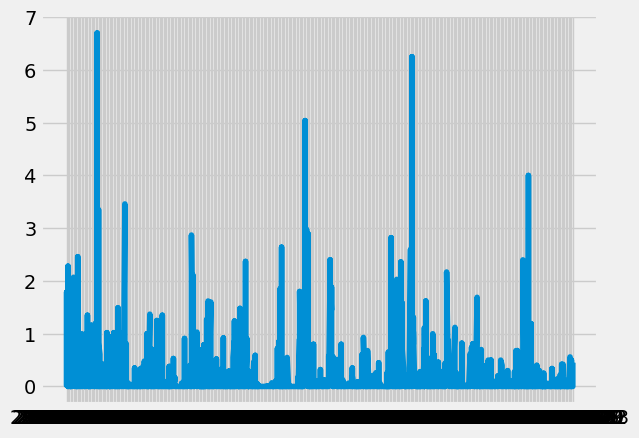

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_twelve_months = session.query(Measurement).filter(Measurement.date >= '2016-08-23').all()
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
conn = engine.connect()
prec_data = pd.read_sql("SELECT * FROM Measurement WHERE date >= '2016-08-23'", conn)
prec_data = prec_data.set_index('date')
# Sort the dataframe by date
prec_data = prec_data.sort_index()
prec_data['prcp']=prec_data['prcp'].fillna(0)
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(prec_data['prcp'])
plt.show()

In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data
count_prcp = prec_data['prcp'].count()
mean_prcp = prec_data['prcp'].mean()
median_prcp = prec_data['prcp'].median()
std_dev_prcp = prec_data['prcp'].std()
var_prcp = prec_data['prcp'].var()

print(count_prcp,mean_prcp,median_prcp,std_dev_prcp,var_prcp)

2230 0.16066367713004426 0.01 0.44206691502654316 0.19542315736108495


# Exploratory Station Analysis

In [55]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(Station).group_by(Station.id).count()
num_stations

9

In [82]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.prcp)).filter(Measurement.prcp > 0).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
station_activity

[('USC00519281', 1973),
 ('USC00516128', 1937),
 ('USC00513117', 1765),
 ('USC00519523', 1191),
 ('USC00514830', 1114),
 ('USC00519397', 919),
 ('USC00511918', 534),
 ('USC00518838', 256),
 ('USC00517948', 229)]

In [100]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').order_by(Measurement.tobs).first()
high_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').order_by(Measurement.tobs.desc()).first()
avg_temp = session.query(Measurement.tobs).filter(Measurement.id == 'USC00519281').

print(f'Low temp: {low_temp}',f'High temp: {high_temp}',f'Average temp: {avg_temp}')

Low temp: (54.0,) High temp: (85.0,) Average temp: SELECT measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.id = ?


In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [16]:
# Close Session
session.close()

NameError: name 'session' is not defined